## 제6장. 머신러닝
## 제9절. 나이브베이즈 분류
### 1. 가우시안
(1) scikit-learn의 GaussianNB
* 코드 실습

In [1]:
import pandas as pd
sky = pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/Skyserver.csv")
sky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [2]:
sky['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

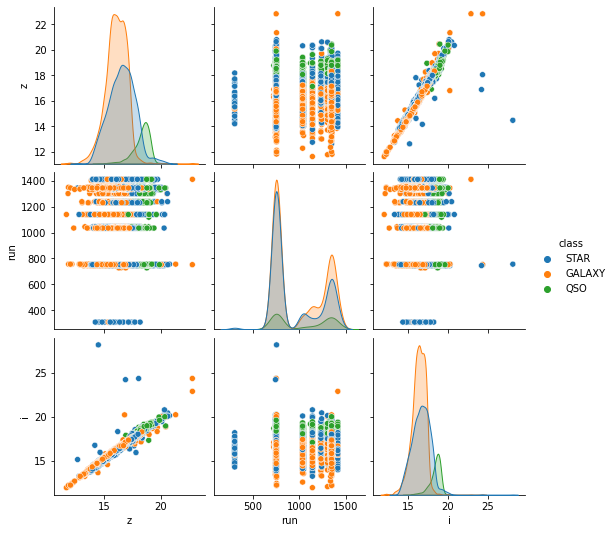

In [3]:
import seaborn as sns
sns.pairplot(hue='class', data =sky[['z', 'run', 'i', 'class']])

In [4]:
import numpy as np
features = list(sky.columns)
features.remove('class')
X = sky[features]
y = sky['class']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1, stratify =y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7000, 17) (7000,)
(3000, 17) (3000,)


In [5]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred = gnb.fit(x_train, y_train).predict(x_test)
print("Accuracy Score : ", gnb.score(x_test, y_test))

Accuracy Score :  0.799


In [6]:
gnb.predict_proba(x_test)[[0 , 13 , 68 ]]

array([[8.26737014e-01, 4.43137039e-02, 1.28949282e-01],
       [5.39851854e-05, 9.64092748e-02, 9.03536740e-01],
       [8.32868012e-01, 4.48282737e-02, 1.22303715e-01]])

In [7]:
gnb.predict(x_test)[[0 , 13 , 68 ]]

array(['GALAXY', 'STAR', 'GALAXY'], dtype='<U6')

In [8]:
from sklearn.metrics import classification_report
pred=gnb.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



### 2. 베르누이
(1) scikit-learn의 BernoulliNB
* 코드 실습

In [9]:
import pandas as pd
spam = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/spam.csv', encoding ='utf-8')
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
spam.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
spam=spam[['v1', 'v2']]
spam

v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ? b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

In [12]:
spam['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [13]:
import numpy as np
spam['label'] = np.where(spam['v1']=='spam', 1, 0)
spam

v1                                                 v2  label
0      ham  Go until jurong point, crazy.. Available only ...      0
1      ham                      Ok lar... Joking wif u oni...      0
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3      ham  U dun say so early hor... U c already then say...      0
4      ham  Nah I don't think he goes to usf, he lives aro...      0
...    ...                                                ...    ...
5567  spam  This is the 2nd time we have tried 2 contact u...      1
5568   ham               Will ? b going to esplanade fr home?      0
5569   ham  Pity, * was in mood for that. So...any other s...      0
5570   ham  The guy did some bitching but I acted like i'd...      0
5571   ham                         Rofl. Its true to its name      0

[5572 rows x 3 columns]

In [14]:
X= spam['v2']
y = spam['label']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1, stratify =y)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3900,) (3900,)
(1672,) (1672,)


In [15]:
from sklearn.feature_extraction.text import CountVectorizer 
cv = CountVectorizer(binary =True)
x_traincv = cv.fit_transform(x_train)
x_traincv.shape

(3900, 7175)

In [16]:
encoded_input = x_traincv.toarray()
encoded_input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
print(cv.inverse_transform(encoded_input[[0]]))

[array(['couple', 'down', 'give', 'me', 'minutes', 'my', 'sure', 'to',
       'track', 'wallet', 'yeah'], dtype='<U34')]


In [18]:
print (cv.get_feature_names()[1000 :1010 ], end ='')

['at', 'ate', 'athletic', 'athome', 'atlanta', 'atlast', 'atm', 'attach', 'attached', 'attack']

In [19]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_traincv, y_train)

BernoulliNB()

In [20]:
x_testcv = cv.transform(x_test)
pred = bnb.predict(x_testcv)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print("Accuracy Score : ", acc)

Accuracy Score :  0.9754784688995215


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       0.99      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672



### 2. 다항 나이브베이즈
(1) scikit-learn의 MultinomialNB
* 코드 실습

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/MovieReviews.csv')
df.head()

review  label
0  One of the other reviewers has mentioned that ...      1
1  A wonderful little production. <br /><br />The...      1
2  I thought this was a wonderful way to spend ti...      1
3  Basically there's a family where a little boy ...      0
4  Petter Mattei's "Love in the Time of Money" is...      1

In [6]:
len(df)

9999

In [7]:
from sklearn.model_selection import train_test_split
X = df['review']
y = df['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6999,) (6999,)
(3000,) (3000,)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=False)
x_traincv = cv.fit_transform(x_train)
x_traincv.shape

(6999, 45220)

In [9]:
print (cv.inverse_transform(x_traincv)[0])

['pathetic' 'attempt' 'to' 'use' 'science' 'justify' 'new' 'age'
 'religion' 'philosophy' 'the' 'two' 'have' 'nothing' 'do' 'with' 'each'
 'other' 'and' 'much' 'of' 'what' 'is' 'said' 'about' 'quantum' 'physics'
 'in' 'this' 'mess' 'just' 'plain' 'wrong' 'br' 'examples' 'theory'
 'supports' 'ideas' 'eastern' 'religions' 'that' 'reality' 'an' 'illusion'
 'how' 'well' 'world' 'subatomic' 'you' 'can' 'never' 'definitely'
 'predict' 'particles' 'location' 'at' 'specific' 'time' 'only' 'give'
 'odds' 'it' 'being' 'precisely' 'one' 'spot' 'also' 'act' 'observation'
 'seems' 'affect' 'event' 'solid' 'pass' 'through' 'barriers' 'all' 'so'
 'far' 'accurate' 'but' 'then' 'they' 'assert' 'means' 'if' 'believed'
 'sincerely' 'enough' 'could' 'walk' 'wall' 'indeed' 'complete'
 'poppycock' 'instead' 'asserts' 'our' 'level' 'possible' 'for' 'merely'
 'by' 'chance' 'has' 'belief' 'keep' 'walking' 'into' 'eternity' 'ever'
 'even' 'remotest' 'passing' 'are' 'astronomically' 'against' 'example'
 'misrepr

In [10]:
print (cv.get_feature_names()[1000 :1010])

['adhered', 'adherence', 'adhering', 'adhesive', 'adibah', 'adieu', 'aditiya', 'aditya', 'adj', 'adjacent']


In [11]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_traincv, y_train)

MultinomialNB()

In [12]:
from sklearn.metrics import accuracy_score, classification_report
x_testcv = cv.transform(x_test)
pred = mnb.predict(x_testcv)
acc = accuracy_score(y_test, pred)
print("Accuracy Score : ", acc)

Accuracy Score :  0.834


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1495
           1       0.86      0.80      0.83      1505

    accuracy                           0.83      3000
   macro avg       0.84      0.83      0.83      3000
weighted avg       0.84      0.83      0.83      3000

